In [1]:
import pandas as pd

df = pd.read_json("playerSessions.json")

df["duration_sec"] = df["duration"].str.replace(" seconds", "").astype(int)

df["date"] = pd.to_datetime(df["date"])

df.head()

,date,duration,jumps,score,obstaclesPassed,duration_sec
0,2025-05-09 23:53:50,11 seconds,5,0,0,11
1,2025-05-09 23:54:16,14 seconds,10,1,1,14
2,2025-05-09 23:55:19,67 seconds,40,10,12,67
3,2025-05-09 23:56:46,153 seconds,100,30,35,153
4,2025-05-10 13:12:26,20 seconds,8,1,2,20


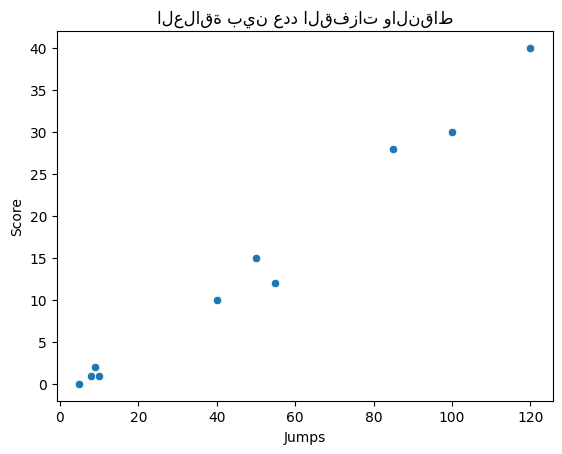

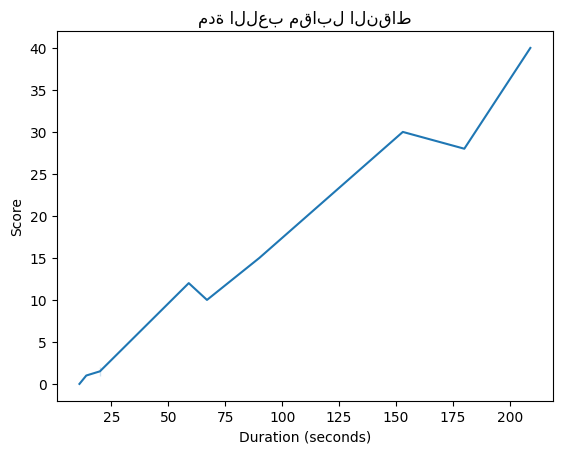

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x="jumps", y="score")
plt.title("العلاقة بين عدد القفزات والنقاط")
plt.xlabel("Jumps")
plt.ylabel("Score")
plt.show()

sns.lineplot(data=df, x="duration_sec", y="score")
plt.title("مدة اللعب مقابل النقاط")
plt.xlabel("Duration (seconds)")
plt.ylabel("Score")
plt.show()

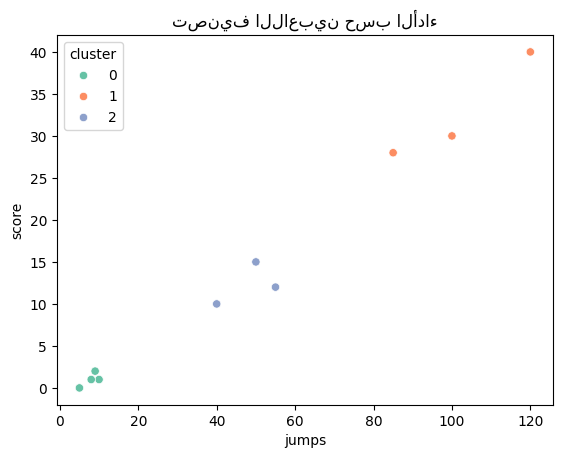

In [3]:
from sklearn.cluster import KMeans

features = df[["duration_sec", "jumps", "score"]]
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)
df["cluster"] = kmeans.labels_

sns.scatterplot(data=df, x="jumps", y="score", hue="cluster", palette="Set2")
plt.title("تصنيف اللاعبين حسب الأداء")
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df["failed"] = df["score"] == 0

X = df[["duration_sec", "jumps", "obstaclesPassed"]]
y = df["failed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("الدقة:", model.score(X_test, y_test))

الدقة: 0.6666666666666666


In [5]:
avg_duration_failures = df[df["failed"]]["duration_sec"].mean()

if avg_duration_failures > 30:
    print("🚨 اللاعبون الذين يخسرون غالبًا يلعبون لأكثر من 30 ثانية → أضف تلميحات أو تبسيط اللعب.")
else:
    print("✅ اللاعبون الذين يخسرون يخفقون بسرعة → قد تحتاج لتحفيزهم أو تبسيط المرحلة الأولى.")

✅ اللاعبون الذين يخسرون يخفقون بسرعة → قد تحتاج لتحفيزهم أو تبسيط المرحلة الأولى.
